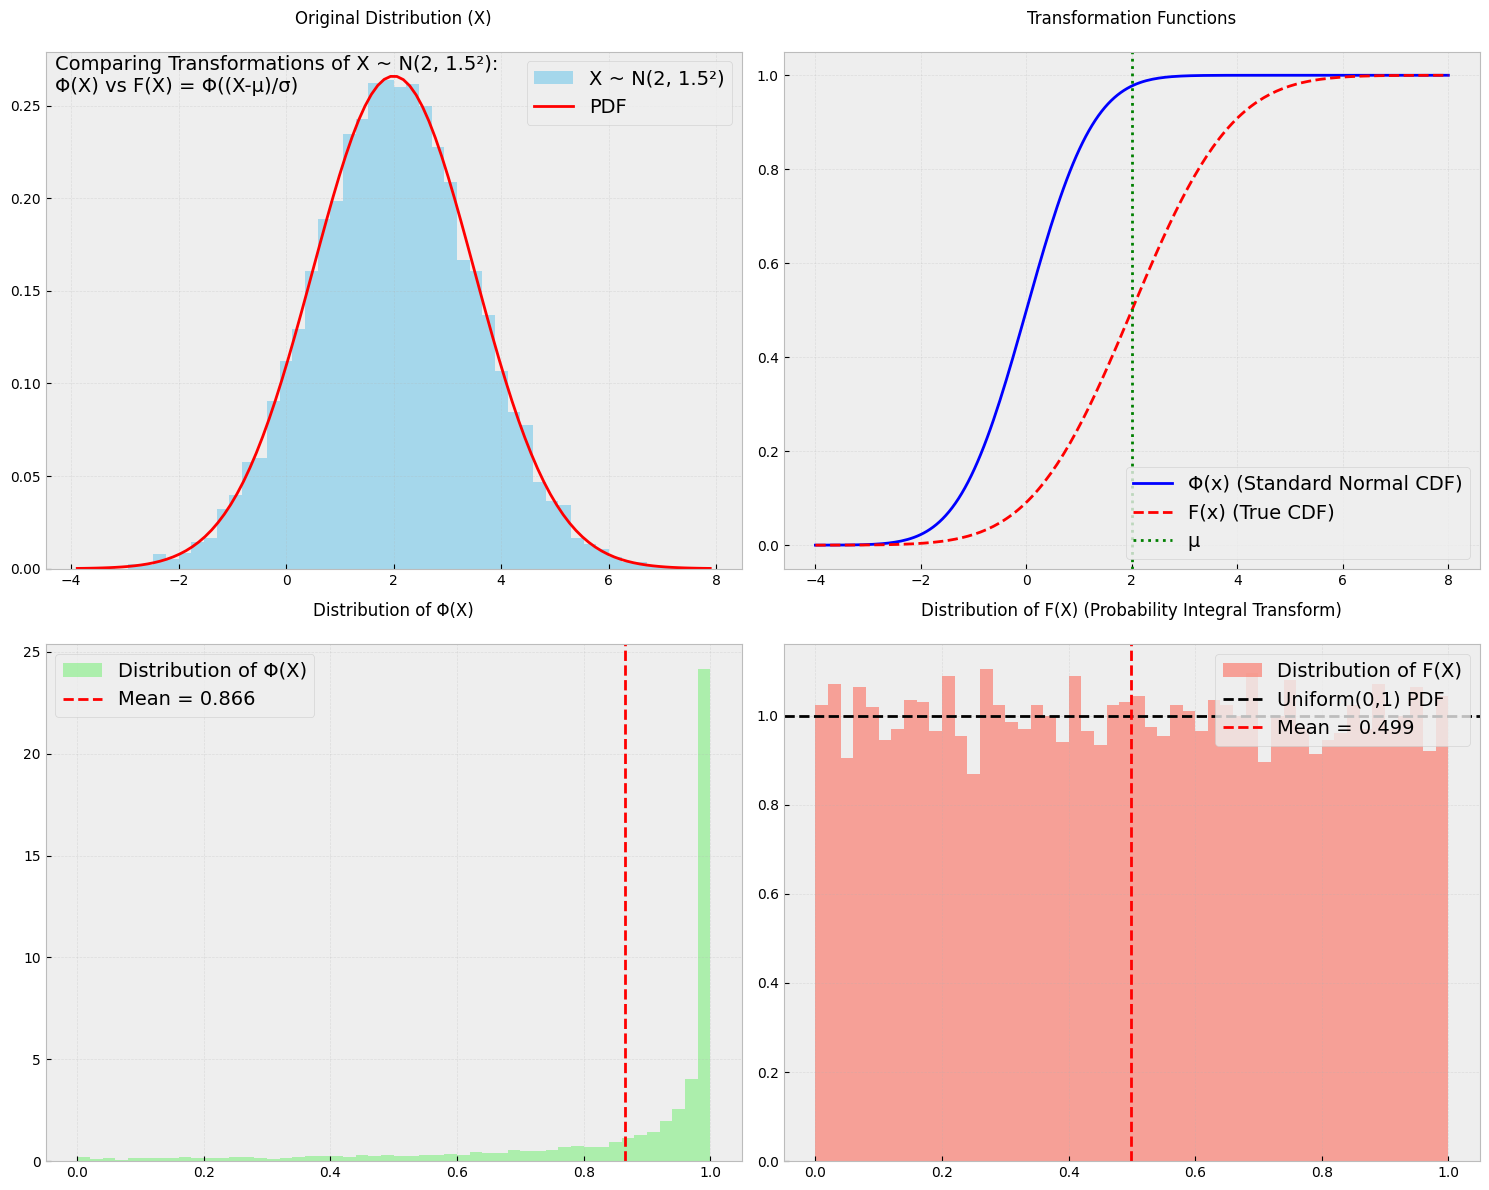

Mean of Φ(X): 0.8657
Mean of F(X): 0.4993
Theoretical E[Φ(X)]: 0.8664


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('bmh')
# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Parameters for our normal distribution
mu = 2
sigma = 1.5
n_samples = 10000

# Generate samples from N(mu, sigma^2)
X = np.random.normal(mu, sigma, n_samples)

# Calculate both transformations
Y1 = norm.cdf(X)  # Standard normal CDF (Φ(X))
Y2 = norm.cdf((X - mu)/sigma)  # True CDF (F(X)) - Probability Integral Transform

# Plot 1: Original Distribution of X
ax1.hist(X, bins=50, density=True, alpha=0.7, color='skyblue', 
         label=f'X ~ N({mu}, {sigma}²)')
x_range = np.linspace(X.min(), X.max(), 100)
ax1.plot(x_range, norm.pdf(x_range, mu, sigma), 'r-', lw=2, 
         label='PDF')
ax1.set_title('Original Distribution (X)', fontsize=12, pad=20)
ax1.legend(fontsize=14)
ax1.grid(True, alpha=0.3)

# Plot 2: Transformation Functions
x_transform = np.linspace(-4, 8, 200)
y1 = norm.cdf(x_transform)  # Φ(x)
y2 = norm.cdf((x_transform - mu)/sigma)  # F(x)

ax2.plot(x_transform, y1, 'b-', label='Φ(x) (Standard Normal CDF)', lw=2)
ax2.plot(x_transform, y2, 'r--', label='F(x) (True CDF)', lw=2)
ax2.axvline(x=mu, color='g', linestyle=':', label='μ')
ax2.set_title('Transformation Functions', fontsize=12, pad=20)
ax2.legend(fontsize=14)
ax2.grid(True, alpha=0.3)

# Plot 3: Distribution of Φ(X)
ax3.hist(Y1, bins=50, density=True, alpha=0.7, color='lightgreen',
         label='Distribution of Φ(X)')
ax3.axvline(x=np.mean(Y1), color='r', linestyle='--',
            label=f'Mean = {np.mean(Y1):.3f}')
ax3.set_title('Distribution of Φ(X)', fontsize=12, pad=20)
ax3.legend(fontsize=14)
ax3.grid(True, alpha=0.3)

# Plot 4: Distribution of F(X) (should be uniform)
ax4.hist(Y2, bins=50, density=True, alpha=0.7, color='salmon',
         label='Distribution of F(X)')
ax4.axhline(y=1, color='k', linestyle='--', label='Uniform(0,1) PDF')
ax4.axvline(x=np.mean(Y2), color='r', linestyle='--',
            label=f'Mean = {np.mean(Y2):.3f}')
ax4.set_title('Distribution of F(X) (Probability Integral Transform)',
              fontsize=12, pad=20)
ax4.legend(fontsize=14)
ax4.grid(True, alpha=0.3)

# Add text explanation
fig.text(0.04, 0.95, 
         f'Comparing Transformations of X ~ N({mu}, {sigma}²):\n' +
         'Φ(X) vs F(X) = Φ((X-μ)/σ)',
         fontsize=14, ha='left', va='top')

plt.tight_layout()
plt.show()

# Print numerical summaries
print(f"Mean of Φ(X): {np.mean(Y1):.4f}")
print(f"Mean of F(X): {np.mean(Y2):.4f}")
print(f"Theoretical E[Φ(X)]: {norm.cdf(mu/np.sqrt(sigma**2 + 1)):.4f}")

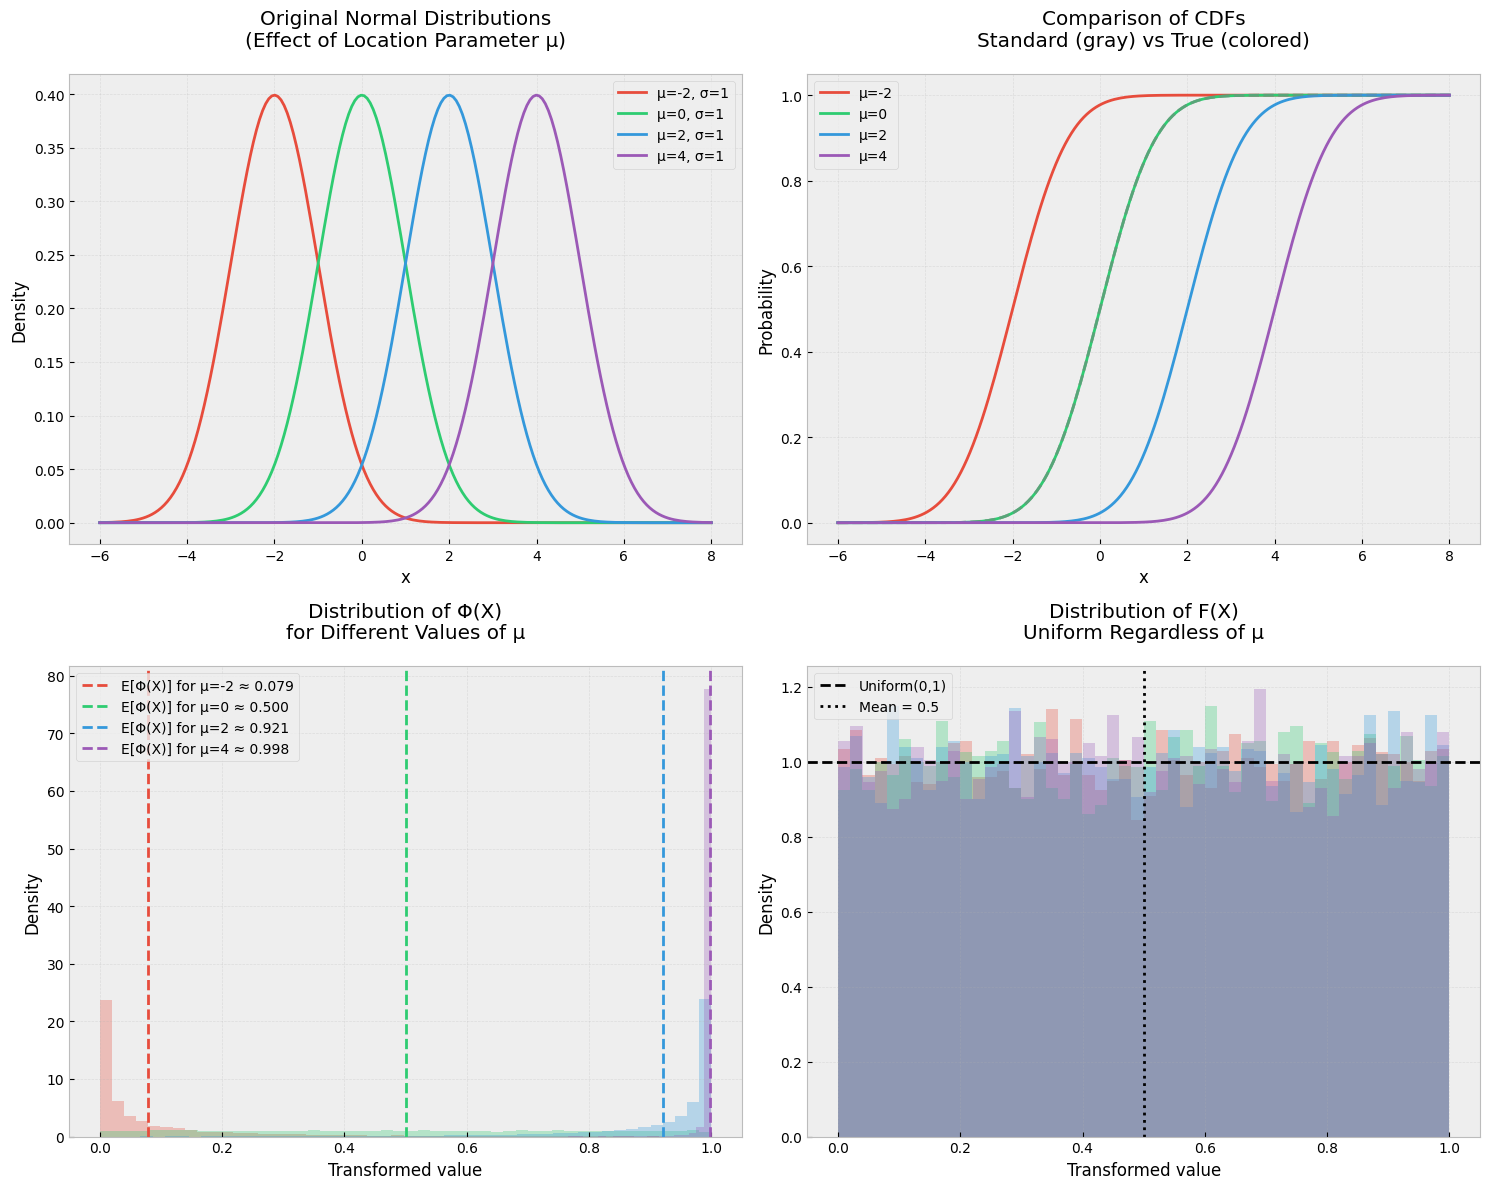

Theoretical E[Φ(X)] for different μ values:
μ = -2: 0.0786
μ =  0: 0.5000
μ =  2: 0.9214
μ =  4: 0.9977


In [10]:

plt.style.use('bmh')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Fixed parameters
sigma = 1
n_samples = 10000
mu_values = [-2, 0, 2, 4]
colors = ['#e74c3c', '#2ecc71', '#3498db', '#9b59b6']

# Plot distributions and their transformations
x = np.linspace(-6, 8, 200)

# Original Distributions
for mu, color in zip(mu_values, colors):
    pdf = norm.pdf(x, mu, sigma)
    ax1.plot(x, pdf, color=color, label=f'μ={mu}, σ={sigma}')
    
ax1.set_title('Original Normal Distributions\n(Effect of Location Parameter μ)', pad=20)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('Density')

# CDFs
for mu, color in zip(mu_values, colors):
    # Standard normal CDF transformation
    ax2.plot(x, norm.cdf(x), '--', color='gray', alpha=0.3)
    # True CDF for each distribution
    ax2.plot(x, norm.cdf((x-mu)/sigma), color=color, label=f'μ={mu}')

ax2.set_title('Comparison of CDFs\nStandard (gray) vs True (colored)', pad=20)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('Probability')

# Distribution of Φ(X)
for mu, color in zip(mu_values, colors):
    X = np.random.normal(mu, sigma, n_samples)
    Y = norm.cdf(X)
    ax3.hist(Y, bins=50, density=True, alpha=0.3, color=color)
    # Add vertical line for theoretical mean
    theoretical_mean = norm.cdf(mu/np.sqrt(sigma**2 + 1))
    ax3.axvline(x=theoretical_mean, color=color, linestyle='--',
                label=f'E[Φ(X)] for μ={mu} ≈ {theoretical_mean:.3f}')

ax3.set_title('Distribution of Φ(X)\nfor Different Values of μ', pad=20)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('Transformed value')
ax3.set_ylabel('Density')

# Distribution of F(X)
for mu, color in zip(mu_values, colors):
    X = np.random.normal(mu, sigma, n_samples)
    Y = norm.cdf((X-mu)/sigma)
    ax4.hist(Y, bins=50, density=True, alpha=0.3, color=color)

ax4.axhline(y=1, color='black', linestyle='--', label='Uniform(0,1)')
ax4.axvline(x=0.5, color='black', linestyle=':', label='Mean = 0.5')
ax4.set_title('Distribution of F(X)\nUniform Regardless of μ', pad=20)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Transformed value')
ax4.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Print theoretical means for each μ
print("Theoretical E[Φ(X)] for different μ values:")
for mu in mu_values:
    theoretical_mean = norm.cdf(mu/np.sqrt(sigma**2 + 1))
    print(f"μ = {mu:2d}: {theoretical_mean:.4f}")

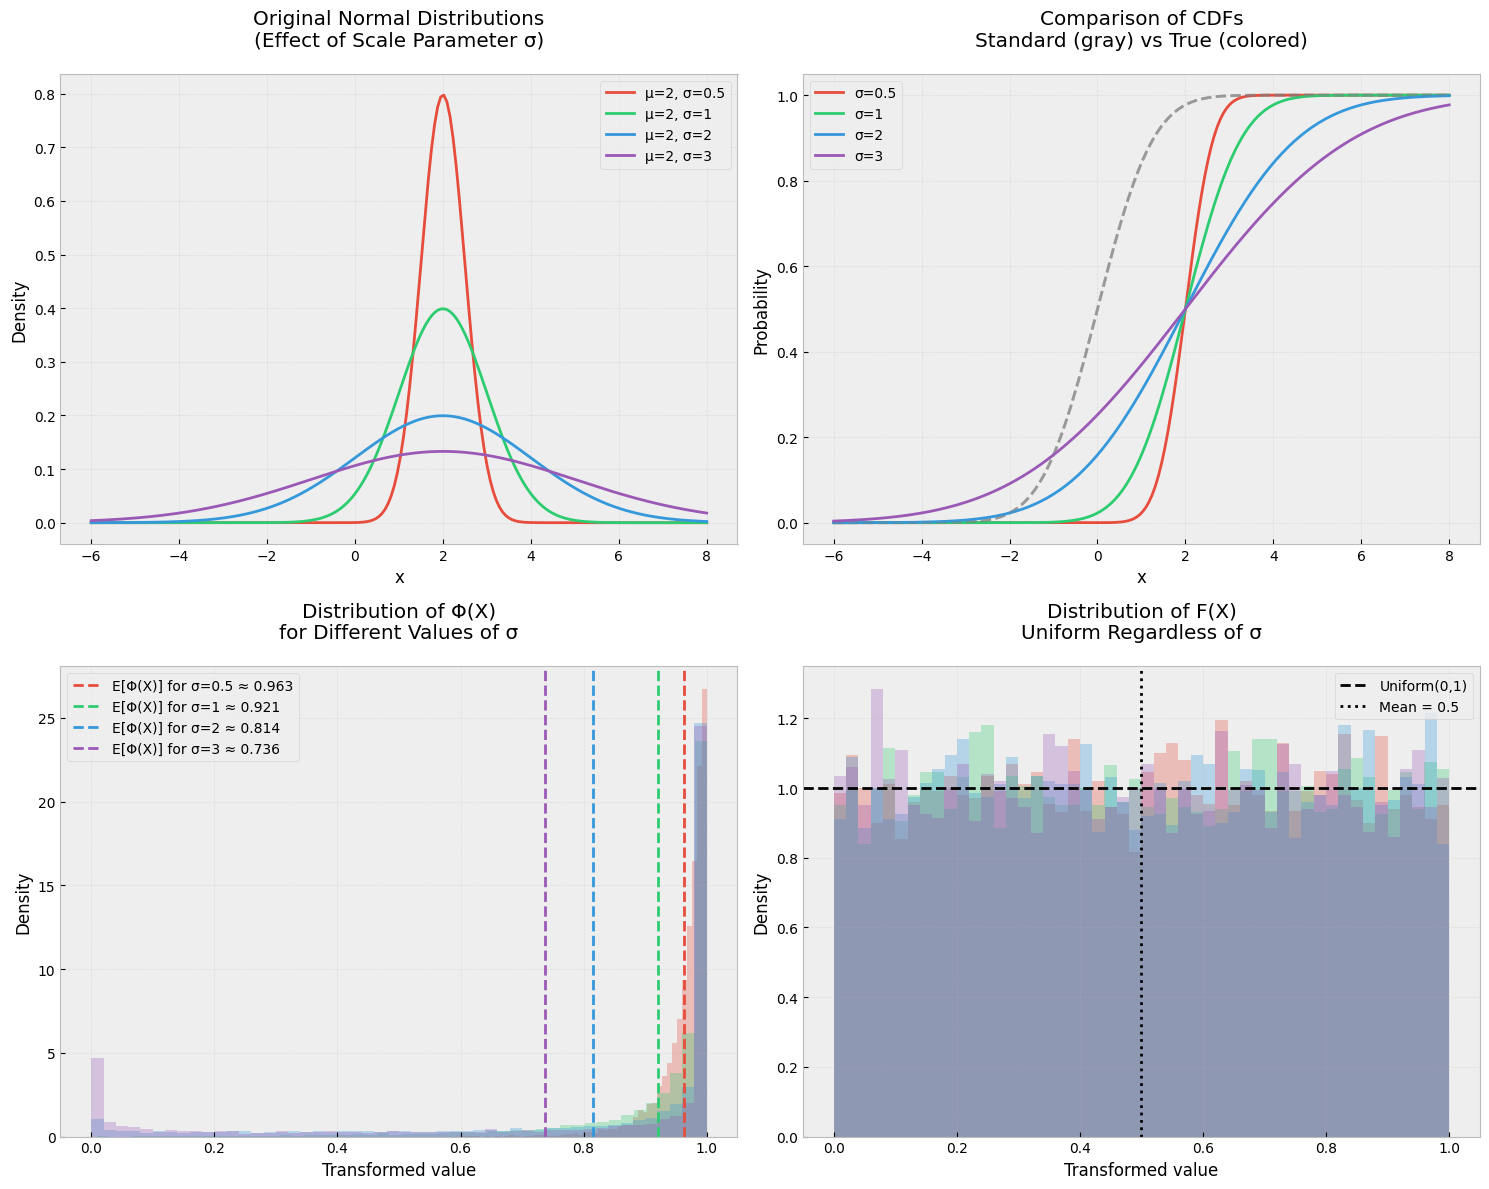

Theoretical E[Φ(X)] for different σ values:
σ = 0.5: 0.9632
σ = 1.0: 0.9214
σ = 2.0: 0.8145
σ = 3.0: 0.7365


In [12]:

plt.style.use('bmh')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Fixed location parameter
mu = 2
n_samples = 10000
sigma_values = [0.5, 1, 2, 3]
colors = ['#e74c3c', '#2ecc71', '#3498db', '#9b59b6']

# Plot distributions and their transformations
x = np.linspace(-6, 8, 200)

# Original Distributions
for sigma, color in zip(sigma_values, colors):
    pdf = norm.pdf(x, mu, sigma)
    ax1.plot(x, pdf, color=color, label=f'μ={mu}, σ={sigma}')
    
ax1.set_title('Original Normal Distributions\n(Effect of Scale Parameter σ)', pad=20)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('Density')

# CDFs
for sigma, color in zip(sigma_values, colors):
    # Standard normal CDF transformation
    ax2.plot(x, norm.cdf(x), '--', color='gray', alpha=0.3)
    # True CDF for each distribution
    ax2.plot(x, norm.cdf((x-mu)/sigma), color=color, label=f'σ={sigma}')

ax2.set_title('Comparison of CDFs\nStandard (gray) vs True (colored)', pad=20)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('Probability')

# Distribution of Φ(X)
for sigma, color in zip(sigma_values, colors):
    X = np.random.normal(mu, sigma, n_samples)
    Y = norm.cdf(X)
    ax3.hist(Y, bins=50, density=True, alpha=0.3, color=color)
    # Add vertical line for theoretical mean
    theoretical_mean = norm.cdf(mu/np.sqrt(sigma**2 + 1))
    ax3.axvline(x=theoretical_mean, color=color, linestyle='--',
                label=f'E[Φ(X)] for σ={sigma} ≈ {theoretical_mean:.3f}')

ax3.set_title('Distribution of Φ(X)\nfor Different Values of σ', pad=20)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('Transformed value')
ax3.set_ylabel('Density')

# Distribution of F(X)
for sigma, color in zip(sigma_values, colors):
    X = np.random.normal(mu, sigma, n_samples)
    Y = norm.cdf((X-mu)/sigma)
    ax4.hist(Y, bins=50, density=True, alpha=0.3, color=color)

ax4.axhline(y=1, color='black', linestyle='--', label='Uniform(0,1)')
ax4.axvline(x=0.5, color='black', linestyle=':', label='Mean = 0.5')
ax4.set_title('Distribution of F(X)\nUniform Regardless of σ', pad=20)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Transformed value')
ax4.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Print theoretical means for each σ
print("Theoretical E[Φ(X)] for different σ values:")
for sigma in sigma_values:
    theoretical_mean = norm.cdf(mu/np.sqrt(sigma**2 + 1))
    print(f"σ = {sigma:.1f}: {theoretical_mean:.4f}")